### Data preparation
* Boston houce price data can be directly loaded in sklearn.

In [68]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
boston = load_boston()
boston_data = boston.data
boston_target = boston.target
X_train, X_test, y_train, y_test = train_test_split(boston_data, 
                    boston_target, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


### Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
for i, pred in enumerate(y_pred):
    print('predicted: ', pred, ', target: ', y_test[i])
print('R-squared: {}'.format(lr.score(X_test, y_test)))

predicted:  24.93551831330965 , target:  22.6
predicted:  23.756685968621724 , target:  50.0
predicted:  29.336400798840433 , target:  23.0
predicted:  11.998984436528385 , target:  8.3
predicted:  21.375839986296278 , target:  21.2
predicted:  19.197185106122156 , target:  19.9
predicted:  20.57022125628845 , target:  20.6
predicted:  21.21383020436058 , target:  18.7
predicted:  19.051876589696032 , target:  16.1
predicted:  20.310284418271678 , target:  18.6
predicted:  5.476850574951882 , target:  8.8
predicted:  16.88415507198176 , target:  17.2
predicted:  17.131776112187058 , target:  14.9
predicted:  5.411321869422267 , target:  10.5
predicted:  40.216028704991324 , target:  50.0
predicted:  32.30923608331231 , target:  29.0
predicted:  22.464451114905934 , target:  23.0
predicted:  36.50566714414837 , target:  33.3
predicted:  31.03913253472614 , target:  29.4
predicted:  23.175526741050852 , target:  21.0
predicted:  24.75105204688748 , target:  23.8
predicted:  24.5112243636

### Least Square
* Linear regression problems equals to solving $Y=X\beta$ equations.
* Solution: $\beta = (X^TX)^{-1}X^TY$
* This can be easily done via *lstsq* in numpy

In [70]:
from numpy.linalg import lstsq
import numpy as np
from sklearn.metrics import r2_score
beta = lstsq(X_train, y_train)[0]
y_pred = np.dot(X_test, beta)
print('R-squared: {0:.2f}'.format(r2_score(y_pred, y_test)))

R-squared: 0.53


### Fitting models via gradient descent
* Loss: $SS_{res} = \sum_{i=1}^{n}(y_i - \hat{y}_i)$

In [71]:
# Transform data to standard scale
import numpy as np
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)
X_test = x_scaler.transform(X_test)
y_train = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test = y_scaler.transform(y_test.reshape(-1, 1))

In [72]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(loss='squared_loss')
sgd.fit(X_train, y_train)
print('R-squared: {0:.2f}'.format(sgd.score(X_test, y_test)))

R-squared: 0.65


In [73]:
# Cross Validation
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(sgd, X_train, y_train, cv=5)
print(scores)

[0.76541772 0.55938665 0.76552984 0.69438219 0.79948466]


### Polynominal Regression

In [74]:
# Prepare Data
X_train = [[6], [8], [10], [14], [18]]
y_train = [[7], [9], [13], [17.5], [18]]
X_test = [[6],  [8],   [11], [16]]
y_test = [[8], [12], [15], [18]]

In [75]:
# First try to fit the model via linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('R-Squared: {0:.2f}'.format(lr.score(X_test, y_test)))

R-Squared: 0.81


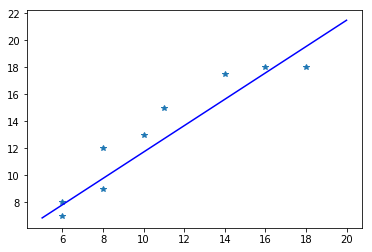

In [76]:
# Visulization
import matplotlib.pyplot as plt
x = np.vstack((X_train, X_test))
y = np.vstack((y_train, y_test))
xx = np.linspace(5, 20, 50)
yy = lr.predict(xx.reshape(-1, 1))
plt.figure()
plt.plot(x, y, '*')
plt.plot(xx, yy, 'b-')
plt.show()

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
pf = PolynomialFeatures(degree=2)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)
pf_regressor = LinearRegression()
pf_regressor.fit(X_train_pf, y_train)
print('R-Squared: {0:.2f}'.format(pf_regressor.score(X_test_pf, y_test)))

R-Squared: 0.87


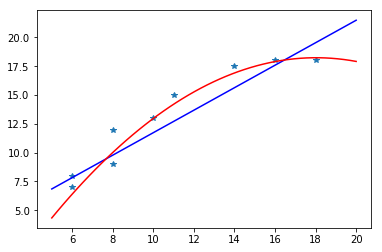

In [78]:
xx_pf = pf.transform(xx.reshape(-1,1))
plt.figure()
plt.plot(x, y, '*')
plt.plot(xx, yy, 'b-')
plt.plot(xx, pf_regressor.predict(xx_pf), 'r-')
plt.show()